<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **PEC 2. Aprendizaje supervisado: problemas de clasificación**

## Introducción

En este ejercicio práctico, aplicaremos las técnicas de clasificación supervisada estudiadas en teoría para resolver un problema práctico utilizando datos reales de un gimnasio. La idea es clasificar a los miembros en función de las calorías que queman durante sus sesiones de ejercicio, lo que podría ayudar a personalizar los planes de entrenamiento de manera más efectiva.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes tengan la capacidad de reunir e interpretar datos relevantes (normalmente dentro de su área de estudio) para emitir juicios que incluyan una reflexión sobre temas relevantes de índole social, científica o ética.
- Identificar y generar nuevas ideas innovadoras que aporten valor económico y/o social.
- Diseñar un marco experimental teniendo en cuenta los métodos más adecuados para la captura, el procesamiento, el almacenamiento, el análisis y la visualización de datos.
- Utilizar de forma combinada los fundamentos matemáticos, estadísticos y de programación para desarrollar soluciones a problemas en el ámbito de la ciencia de los datos.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Interpretar y analizar los resultados de algoritmos de aprendizaje supervisado para problemas de clasificación.
- Proponer nuevos problemas donde un modelado de los datos usando algoritmos de aprendizaje supervisado puedan aportar valorar económico y/o social.
- Conocer las metodologías y etapas básicas de un proyecto de minería de datos o, en general, de un proyecto de ciencia de datos.
- Realizar un análisis de los resultados obtenidos con los principales métodos de aprendizaje automático en problemas de clasificación usando las métricas de evaluación comunes.
- Conocer los principales métodos de aprendizaje automático en problemas supervisados de clasificación, y saber aplicar el tipo de algoritmo adecuado en cada situación, así como sus puntos fuertes y debilidades.


# Descripción del dataset:

El conjunto de datos utilizado para esta PEC se basa en **información de miembros de un gimnasio y sus actividades de ejercicio**. Se busca predecir el nivel de calorías quemadas por los miembros a partir de diferentes características demográficas, fisiológicas y de actividad física.

Descarga: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data

*   Variables:
  *   Age: Edad del miembro.
  *   Gender: Género del miembro.
  *   Experience_Level: Nivel de experiencia en el gimnasio (Principiante, Intermedio, Avanzado).
  *   Max_BPM, Avg_BPM, Resting_BPM: Ritmos cardíacos durante las sesiones de ejercicio.
  *   BMI: Índice de Masa Corporal.
  *   Fat_Percentage: Porcentaje de grasa corporal.
  *   Session_Duration (hours): Duración de la sesión de entrenamiento.
  *   Workout_Type: Tipo de entrenamiento realizado (Cardio, Fuerza, HIIT, etc.).
  *   Calories_Burned: Calorías quemadas (variable continua).

  *   **Variable objetivo:** Calories_Level (nueva variable categórica):
      *   low: Menos de 700 calorías.
      *   medium: Entre 700 y 1000 calorías.
      *   high: Más de 1000 calorías.


Puedes crear nuevas celdas para completar la resolución de los ejercicios.




## **Ejercicio 1 [ 1 punto ]** Análisis Exploratorio de Datos (EDA)

Realiza un análisis exploratorio del conjunto de datos para comprender mejor su estructura y prepararlo para el modelado. Sigue los pasos indicados a continuación.

### Paso 1: Carga de Datos
Carga el conjunto de datos y muestra las primeras filas para familiarizarte con las variables.
*   Importa pandas, numpy, matplotlib, y seaborn para el análisis y visualización de datos.
*   Utiliza pandas.read_csv() para leer el archivo gym_members_exercise_tracking.
csv.
*   Muestra las primeras filas del dataset usando head() para tener una vista rápida de los datos.

In [21]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


# Cargar el dataset
file_path = '/content/drive/My Drive/Maching_Learning/R2/gym_members_exercise_tracking.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


### Paso 2: Entender la Estructura de los Datos
*   Utiliza shape para conocer cuántas filas y columnas tiene el dataset.
*   Usa info() para ver los tipos de datos de cada columna y la cantidad de valores no nulos.
*   Utiliza describe() para obtener un resumen estadístico de las columnas numéricas (media, desviación estándar, mínimos, máximos, etc.).


In [22]:

# Verificar la forma del dataset
shape = df.shape

# Ver información sobre las columnas
info = df.info()

# Resumen estadístico de las variables numéricas
description = df.describe()

shape, info, description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

((973, 15),
 None,
               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
 count  973.000000   973.000000   973.00000  973.000000  973.000000   
 mean    38.683453    73.854676     1.72258  179.883864  143.766701   
 std     12.180928    21.207500     0.12772   11.525686   14.345101   
 min     18.000000    40.000000     1.50000  160.000000  120.000000   
 25%     28.000000    58.100000     1.62000  170.000000  131.000000   
 50%     40.000000    70.000000     1.71000  180.000000  143.000000   
 75%     49.000000    86.000000     1.80000  190.000000  156.000000   
 max     59.000000   129.900000     2.00000  199.000000  169.000000   
 
        Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
 count   973.000000                973.000000       973.000000      973.000000   
 mean     62.223022                  1.256423       905.422405       24.976773   
 std       7.327060                  0.343033       272.641516        6.259419   
 min      50

El dataset contiene 973 filas y 15 columnas. Todas las columnas están completas (sin valores nulos), y los tipos de datos están correctamente asignados para cada columna (numéricos y categóricos).

Resumen estadístico:

- La media de las calorías quemadas es de 905, con un máximo de 1783 y un mínimo de 303.
- La duración promedio de la sesión es de 1.25 horas.
- Los miembros del gimnasio tienen una edad promedio de 38 años, con un rango de 18 a 59 años.

### Paso 3: Identificación de Datos Faltantes y Duplicados
*   Usa isnull().sum() para identificar si hay valores nulos en alguna columna y cuántos.
  *   Tanto si encuentras columnas con valores nulos como si no, reflexiona sobre cómo manejarlos.
*   Verifica si hay filas duplicadas con duplicated().sum() y, de ser necesario, elimina los duplicados utilizando drop_duplicates().


In [23]:
# Verificar valores nulos
missing_values = df.isnull().sum()

# Verificar filas duplicadas
duplicated_rows = df.duplicated().sum()

missing_values, duplicated_rows



(Age                              0
 Gender                           0
 Weight (kg)                      0
 Height (m)                       0
 Max_BPM                          0
 Avg_BPM                          0
 Resting_BPM                      0
 Session_Duration (hours)         0
 Calories_Burned                  0
 Workout_Type                     0
 Fat_Percentage                   0
 Water_Intake (liters)            0
 Workout_Frequency (days/week)    0
 Experience_Level                 0
 BMI                              0
 dtype: int64,
 0)

Aunque no encontré valores nulos en el dataset, siempre es importante reflexionar sobre cómo los manejaría si estuvieran presentes. Dependiendo de la situación, podría optar por varias estrategias. Si los valores nulos fueran escasos, tal vez eliminaría las filas correspondientes para no comprometer la calidad de los datos. En el caso de columnas con una cantidad significativa de valores nulos, evaluaría la importancia de esa variable y consideraría eliminarlas si no aportan mucho valor.

Si decidiera mantener los datos faltantes, podría imputarlos con la media o mediana para variables numéricas, o la moda para variables categóricas, dependiendo de cuál sea la mejor opción en términos de distribución. Sin embargo, también evaluaría opciones más avanzadas como la imputación mediante algoritmos si fuera necesario preservar correlaciones importantes entre variables.

Otra opción podría ser crear una categoría especial para los valores nulos en variables categóricas si creo que la ausencia de un dato en particular tiene algún significado. Siempre es útil analizar el patrón de los datos faltantes para entender mejor su impacto y tomar decisiones fundamentadas sobre cómo manejarlos.

En este caso no fue necesario, pero tener un plan claro para manejar valores nulos es crucial en cualquier análisis.

### Paso 4: Análisis de Variables Categóricas
*   Identifica las variables categóricas.
*   Utiliza gráficos de barras con seaborn (countplot) para visualizar la distribución de estas variables.


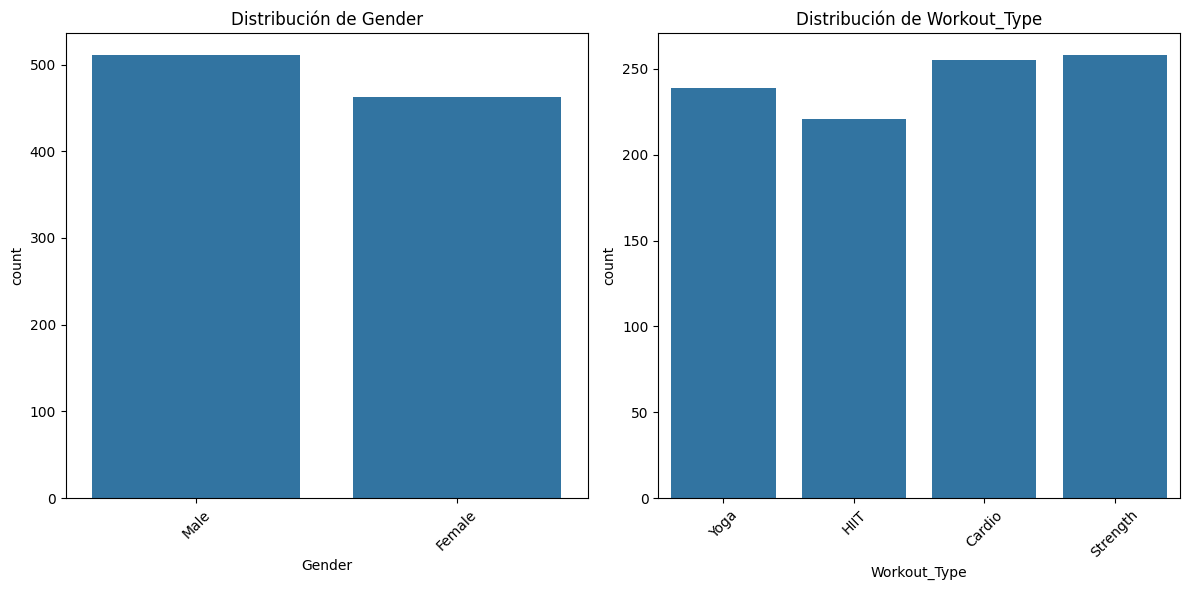

In [24]:
# Identificar las variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Gráfico de barras para visualizar la distribución de las variables categóricas
plt.figure(figsize=(12, 6))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(x=df[column])
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Respuesta:

En el análisis de las variables categóricas, podemos observar lo siguiente:

- Gender: Hay más hombres que mujeres en el dataset.
- Workout_Type: Los tipos de ejercicios más comunes son "Strength" y "Cardio", con "HIIT" y "Yoga" siendo menos frecuentes.

### Paso 5: Análisis de Variables Numéricas
*   Identifica las variables numéricas.
*   Usa gráficos de dispersión (scatterplot) y boxplots para analizar la distribución de estas variables y detectar posibles outliers.


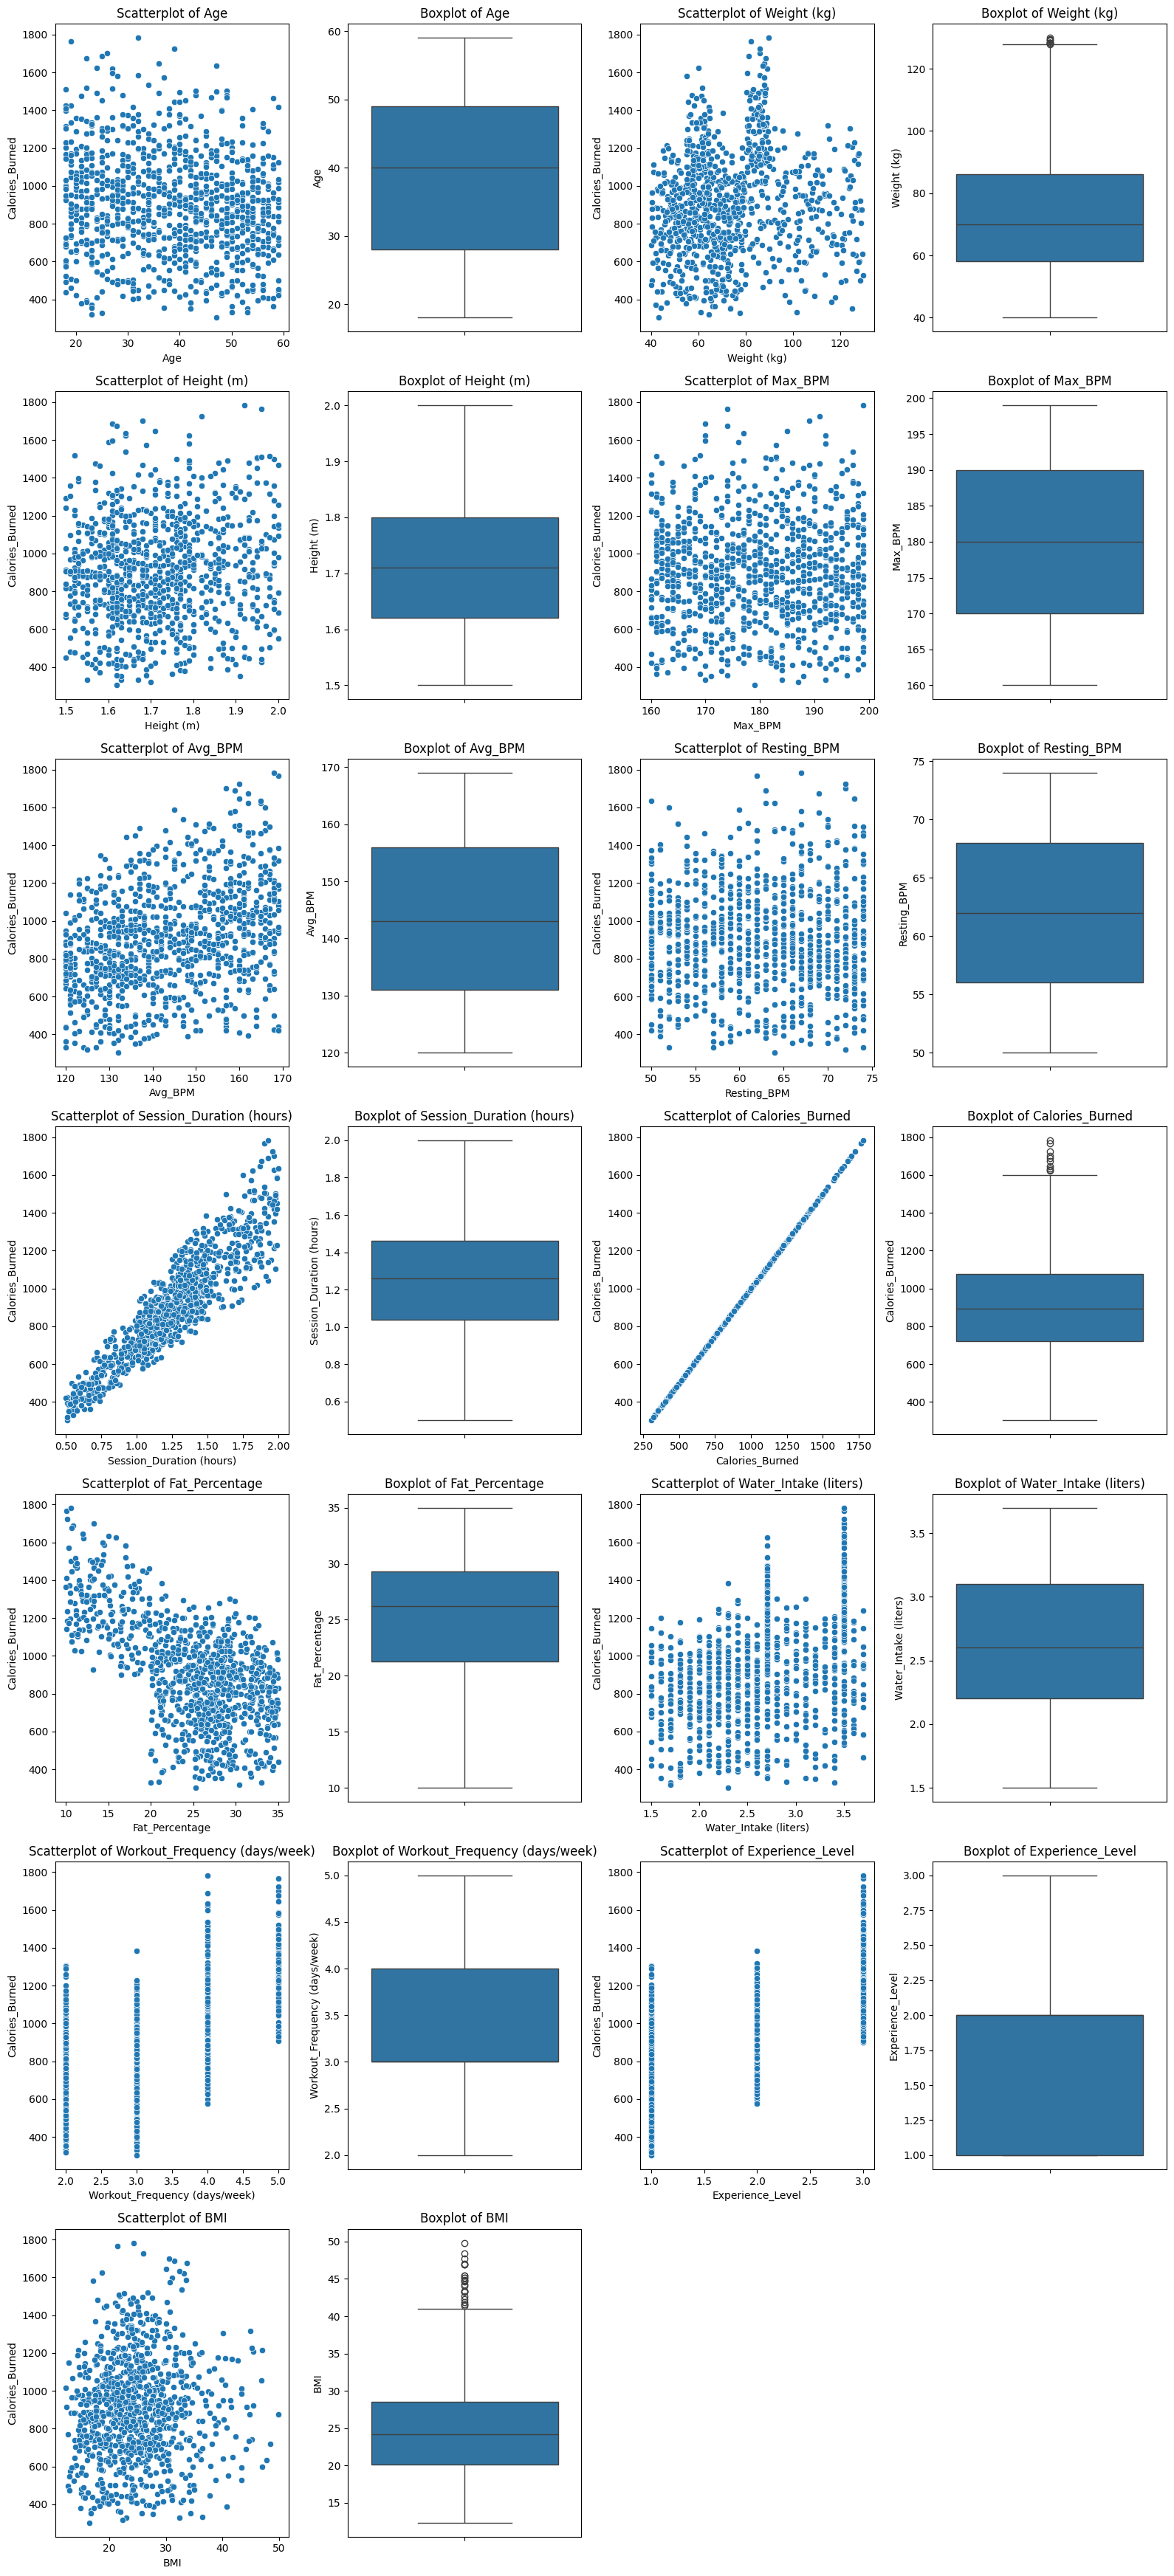

In [25]:
# Identificar las variables numéricas
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Graficar la distribución de las variables numéricas usando gráficos de dispersión (scatterplot) y boxplots
# Determinar el número total de variables numéricas
num_vars = len(numerical_columns)

# Configurar 4 gráficos por fila (2 scatterplots y 2 boxplots por fila)
cols = 4  # 2 scatterplots y 2 boxplots por fila
rows = (num_vars + 1) // 2  # Necesitamos dos gráficos por variable (scatterplot + boxplot)

# Graficar la distribución de las variables numéricas usando gráficos de dispersión y boxplots
plt.figure(figsize=(cols * 4, rows * 5))  # Ajustar el tamaño de la figura según el número de gráficos

for i, column in enumerate(numerical_columns, 1):
    # Gráfico de dispersión
    plt.subplot(rows, cols, 2 * (i - 1) + 1)  # 2 gráficos por variable, este es el scatterplot
    sns.scatterplot(x=df[column], y=df["Calories_Burned"])
    plt.title(f'Scatterplot of {column}')

    # Gráfico de boxplot
    plt.subplot(rows, cols, 2 * (i - 1) + 2)  # Este es el boxplot correspondiente
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


Respuesta:

**Interpretación de los gráficos:**


1. **Age**:
   - **Scatterplot**: La variable `Age` muestra una dispersión amplia en relación con las calorías quemadas, sin una correlación clara.
   - **Boxplot**: No se observan outliers importantes en la edad, y la distribución es relativamente uniforme.

2. **Weight (kg)**:
   - **Scatterplot**: A mayor peso, parece haber una mayor variabilidad en las calorías quemadas, lo que podría ser indicativo de que el peso tiene una influencia moderada en la cantidad de calorías quemadas.
   - **Boxplot**: Hay algunos outliers en el peso en valores altos, lo cual es esperable y refleja personas con pesos significativamente superiores al promedio.

3. **Height (m)**:
   - **Scatterplot**: No muestra una relación clara con `Calories_Burned`, lo que sugiere que la altura puede no ser un factor directamente relevante.
   - **Boxplot**: La altura presenta una distribución sin outliers significativos.

4. **Max_BPM y Avg_BPM**:
   - **Scatterplot**: No hay una tendencia fuerte entre los valores máximos o promedio de BPM y las calorías quemadas, aunque la variabilidad es notable.
   - **Boxplot**: Estas métricas están dentro de rangos esperados y no presentan outliers importantes, lo cual sugiere estabilidad en los valores.

5. **Resting_BPM**:
   - **Scatterplot**: Similar a `Max_BPM`, no se observa una relación directa con las calorías quemadas.
   - **Boxplot**: Presenta una distribución homogénea sin valores atípicos.

6. **Session Duration (hours)**:
   - **Scatterplot**: Aquí se observa una correlación positiva clara entre la duración de la sesión y las calorías quemadas. Esto tiene sentido, ya que a mayor tiempo de ejercicio, mayor es la energía consumida.
   - **Boxplot**: La duración de la sesión es consistente sin valores fuera de lo común.

7. **Fat Percentage**:
   - **Scatterplot**: Interesantemente, parece haber una relación inversa; a menor porcentaje de grasa, mayor es la cantidad de calorías quemadas.
   - **Boxplot**: La distribución es adecuada y representa la variedad en los porcentajes de grasa corporal.

8. **Water Intake (liters)**:
   - **Scatterplot**: No se observa una relación clara con `Calories_Burned`, lo que sugiere que el consumo de agua puede no tener un impacto directo en el gasto calórico.
   - **Boxplot**: La ingesta de agua está dentro de un rango aceptable y no presenta valores anómalos.

9. **Workout Frequency (days/week)**:
   - **Scatterplot**: No hay una tendencia clara, lo cual podría deberse a la variabilidad en la intensidad de los entrenamientos.
   - **Boxplot**: No hay outliers significativos en la frecuencia de entrenamiento.

10. **Experience Level**:
    - **Scatterplot**: No se observa una relación directa con `Calories_Burned`, aunque niveles más avanzados pueden estar asociados con entrenamientos de mayor intensidad.
    - **Boxplot**: Los niveles de experiencia están equilibrados sin valores atípicos.

11. **BMI**:
    - **Scatterplot**: No muestra una correlación clara con las calorías quemadas, aunque los valores están dispersos de manera uniforme.
    - **Boxplot**: Se observan algunos outliers en niveles altos de `BMI`, que podrían representar individuos con mayor peso en relación a su altura.

### Conclusión

- Las variables que parecen tener alguna relación con `Calories_Burned` son `Session Duration`, `Fat Percentage`, y en menor medida, `Weight`.
- Las métricas de BPM y el nivel de experiencia no parecen tener un impacto significativo por sí solas.
- Algunas variables, como `Water Intake` y `Height`, parecen ser independientes de las calorías quemadas.

### Paso 6: Creación de la Variable Calories_Level

La columna Calories_Burned tiene valores numéricos continuos, que representan la cantidad exacta de calorías quemadas por cada miembro en sus sesiones de ejercicio.

Si quisiéramos predecir un valor exacto de calorías quemadas (por ejemplo, 750.5 calorías), estaríamos ante un problema de regresión.

Dado que queremos que el ejercicio sea de clasificación, lo tranformaremos:

Esta variable Calories_Level categoriza el rango de calorías quemadas en tres grupos:
*   low: Para aquellos que queman menos de 700 calorías.
*   medium: Para aquellos que queman entre 700 y 1000 calorías.
*   high: Para aquellos que queman más de 1000 calorías.

Pasos:

*   Divide la columna Calories_Burned en tres categorías: low, medium, y high usando pd.cut().
*   Muestra la cantidad de registros en cada categoría usando value_counts().
*   Crea un gráfico de barras (barplot) para visualizar cuántos miembros caen en cada categoría (low, medium, high).
*   Comenta sobre la distribución de los niveles de calorías quemadas y lo que podría significar para la personalización de los entrenamientos.


In [26]:
# Crear la variable categórica 'Calories_Level' a partir de 'Calories_Burned'
df['Calories_Level'] = pd.cut(df['Calories_Burned'],
                              bins=[0, 700, 1000, float('inf')],
                              labels=['low', 'medium', 'high'])

# Ver la cantidad de registros en cada categoría
calories_level_counts = df['Calories_Level'].value_counts()


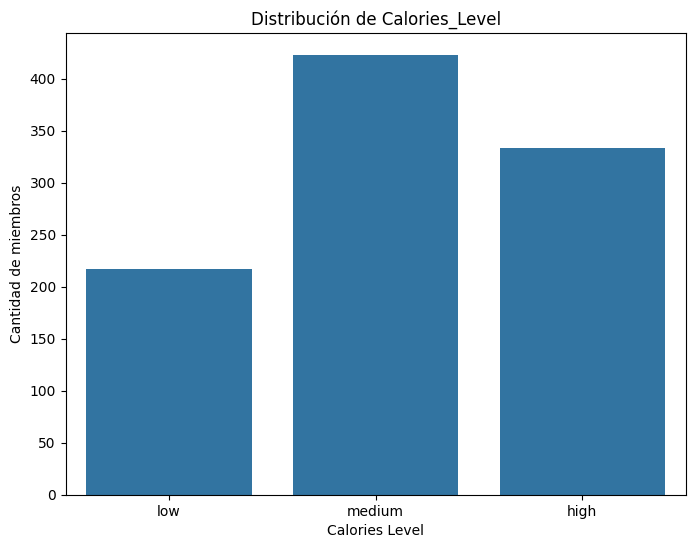

,count
Calories_Level,
medium,423
high,333
low,217


In [27]:
# Gráfico de barras para 'Calories_Level'
plt.figure(figsize=(8, 6))
sns.barplot(x=calories_level_counts.index, y=calories_level_counts.values)
plt.title('Distribución de Calories_Level')
plt.xlabel('Calories Level')
plt.ylabel('Cantidad de miembros')
plt.show()

calories_level_counts

### Análisis de la Distribución de `Calories_Level`

- **Low (menos de 700 calorías)**: 217 miembros.
- **Medium (entre 700 y 1000 calorías)**: 423 miembros.
- **High (más de 1000 calorías)**: 333 miembros.

### Interpretación
La mayoría de los miembros se encuentran en el rango de **"medium"** en cuanto a calorías quemadas, seguido de una cantidad significativa en el rango **"high"** y una menor proporción en el rango **"low"**. Esto sugiere que la mayoría de los entrenamientos de los miembros son de intensidad media a alta.

Para la personalización de los planes de entrenamiento:
- Los miembros en el nivel **"low"** podrían beneficiarse de planes para aumentar gradualmente la intensidad.
- Los miembros en **"medium"** están en un rango óptimo para el desarrollo de resistencia o fuerza según sus objetivos.
- Los miembros en el nivel **"high"** pueden estar enfocados en objetivos avanzados o de alto rendimiento.

Esta segmentación puede ayudar a diseñar entrenamientos más personalizados para cada nivel de gasto calórico.

## **Ejercicio 2 [ 0.5 puntos ]** Describe el dataset

*   Elemento de lista
*   Elemento de lista



Para ello utiliza el análisis que has realizado en el ejercicio anterior. Identifica las variables explicativas de la variable a predecir

*pon tu respuesta entre aquí*


**Descripción del Dataset:**

El dataset contiene información detallada sobre miembros de un gimnasio, incluyendo aspectos personales y su desempeño en diferentes entrenamientos. A continuación, se describe el dataset en función del análisis previo:

1. **Variables numéricas:**
   - **Age**: Edad de los miembros (rango de 18 a 59 años, con una media de 38 años).
   - **Weight (kg)**: Peso en kilogramos (rango de 40 kg a 129.9 kg).
   - **Height (m)**: Altura en metros, varía entre 1.50 m y 2.00 m.
   - **Max_BPM**, **Avg_BPM**, **Resting_BPM**: Información sobre el ritmo cardíaco máximo, promedio, y en reposo durante el entrenamiento.
   - **Session_Duration (hours)**: Duración de la sesión de entrenamiento (de 0.5 a 2 horas).
   - **Calories_Burned**: Número de calorías quemadas durante una sesión (entre 303 y 1783 calorías).
   - **Fat_Percentage**: Porcentaje de grasa corporal (mínimo de 10%, máximo de 35%).
   - **Water_Intake (liters)**: Ingesta de agua en litros (de 1.5 a 3.7 litros por sesión).
   - **Workout_Frequency (days/week)**: Frecuencia de los entrenamientos, expresada en días por semana.
   - **Experience_Level**: Nivel de experiencia de los miembros en el entrenamiento (1: bajo, 2: medio, 3: alto).
   - **BMI**: Índice de masa corporal (BMI), varía entre 12.32 y 49.84.

2. **Variables categóricas:**
   - **Gender**: Género de los miembros (masculino y femenino).
   - **Workout_Type**: Tipo de entrenamiento que realizan los miembros (Yoga, HIIT, Cardio, Strength).
   - **Calories_Level**: Variable creada que categoriza las calorías quemadas en tres niveles: bajo (low), medio (medium) y alto (high).

**Variable a predecir:**
La variable que se pretende predecir es **Calories_Level**, que clasifica el número de calorías quemadas por los miembros en tres grupos: "low", "medium", y "high". Esto convierte el problema en uno de clasificación en lugar de regresión.

3. **Variables explicativas:**
Las siguientes variables tienen un impacto potencial en la cantidad de calorías quemadas (Calories_Level) y podrían ser utilizadas como variables explicativas en un modelo predictivo:

   - **Age (Edad)**: No se observó una correlación directa con las calorías quemadas. Puede influir en el tipo de entrenamiento y en la intensidad recomendada, pero no es determinante para `Calories_Level`.
   - **Gender (Género)**: No se ha explorado a fondo, pero podría tener algún impacto en la capacidad de quema de calorías debido a diferencias fisiológicas.
   - **Weight (kg) y BMI**: Aunque muestran cierta dispersión, el peso y el índice de masa corporal (BMI) tienen una relación moderada con el nivel de calorías quemadas. Los miembros con mayor peso tienden a quemar más calorías debido al esfuerzo adicional.
   - **Max_BPM, Avg_BPM, Resting_BPM**: Estas variables de ritmo cardíaco no mostraron una correlación clara con `Calories_Level`. Sin embargo, los ritmos más altos podrían indicar sesiones de mayor intensidad, lo cual indirectamente podría estar asociado a una quema calórica elevada.
   - **Session Duration (Duración de la sesión)**: Es una de las variables más relevantes, mostrando una correlación positiva clara con `Calories_Burned`. Sesiones más largas suelen resultar en un mayor gasto calórico.
   - **Fat_Percentage (Porcentaje de grasa)**: Muestra una relación inversa con las calorías quemadas, ya que los miembros con menor porcentaje de grasa tienden a quemar más calorías, posiblemente debido a una mayor capacidad cardiovascular o metabólica.
   - **Water_Intake (litros de agua)**: No se observó relación directa con `Calories_Level`, aunque una mayor ingesta podría ser un indicador de ejercicios de mayor duración o intensidad.
   - **Workout_Frequency (Frecuencia de entrenamiento)**: La frecuencia de entrenamiento no mostró una relación clara con las calorías quemadas en cada sesión, pero puede influir en el nivel de condición física de los miembros.
   - **Experience_Level (Nivel de experiencia)**: No mostró una correlación directa con `Calories_Burned`, aunque niveles de experiencia más altos pueden estar asociados con sesiones más intensas o especializadas.

4. **Conclusiones sobre las variables explicativas**:
   - Las variables **`Session Duration`** y **`Fat Percentage`** parecen ser las más significativas para predecir `Calories_Level`, ya que tienen una relación más directa con la quema de calorías.
   - **Weight (kg)** y **BMI** también son variables importantes, aunque de forma más moderada.
   - Variables como **Max_BPM** y **Avg_BPM** pueden servir de apoyo para entender la intensidad de las sesiones, pero no son tan determinantes por sí solas.
   - Las demás variables aportan contexto y pueden enriquecer el modelo, pero no son esenciales para la predicción directa del nivel de calorías quemadas.

## **Ejercicio 3 [ 2.5 puntos ]** Preprocessamiento de los datos

Usa [sklearn preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) i/o pandas para hacer el procesamient de los datos del dataset:


**3 a) [0,5 puntos]** divide entre los datos explicativos (X) y a predecir (y):

Divide el conjunto de datos en las variables explicativas (X) y la variable objetivo (y). La variable objetivo es Calories_Level, que indica si un miembro quema low, medium, o high calorías.

In [29]:
# pon tu código entre aquí
# Importar la librería necesaria de sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Dividir el conjunto de datos entre variables explicativas (X) y la variable a predecir (y)
X = df.drop(columns=['Calories_Level', 'Calories_Burned'])
y = df['Calories_Level']

# Codificar las etiquetas de la variable objetivo 'y' utilizando LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Mostrar las primeras filas de X
X.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,Strength,29.2,2.8,3,1,14.39


**3 b) [1 punto]:** Transformación de datos:
*   Transforma las variables explicativas de categóricas a numéricas. Realiza una codificación OneHot de las variables categóricas Workout_Type y Gender para convertirlas en variables numéricas.
*   Transforma la variable y (Calories_Level) a valores numéricos utilizando LabelEncoder.

In [30]:
# pon tu código entre aquí
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Realizar la codificación OneHot de las variables categóricas
# Verificar si las columnas categóricas existen antes de aplicar OneHotEncoder
if 'Workout_Type' in X.columns and 'Gender' in X.columns:
    onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Corrección aquí
    X_categorical = X[['Workout_Type', 'Gender']]
    X_categorical_encoded = onehot_encoder.fit_transform(X_categorical)

    # Convertir el resultado a un DataFrame para integrarlo con el resto de X
    X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded,
                                            columns=onehot_encoder.get_feature_names_out(X_categorical.columns))

    # Eliminar las columnas originales categóricas y unir las transformadas
    X = X.drop(columns=['Workout_Type', 'Gender'])
    X = pd.concat([X, X_categorical_encoded_df], axis=1)

# Mostrar la forma del conjunto de características transformadas
X_shape = X.shape
# Mostrar la forma del conjunto de características transformadas
print("Forma del conjunto de características transformadas:", X.shape)

# Transformar la variable objetivo utilizando LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Mostrar los primeros valores de y_encoded
print("Primeros valores de y_encoded:", y_encoded[:5])



Forma del conjunto de características transformadas: (973, 16)
Primeros valores de y_encoded: [0 2 1 1 1]


In [31]:
# Mostrar las primeras filas del DataFrame transformado
print("Primeras filas del DataFrame transformado:")
print(X.head())


Primeras filas del DataFrame transformado:
   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Fat_Percentage  Water_Intake (liters)  \
0                      1.69            12.6                    3.5   
1                      1.30            33.9                    2.1   
2                      1.11            33.4                    2.3   
3                      0.59            28.8                    2.1   
4                      0.64            29.2                    2.8   

   Workout_Frequency (days/week)  Experience_Level    BMI  Workout_Type_HIIT  \
0                              4                 3  30.20  

La transformación incluyó:

- **Codificación OneHot** para `Workout_Type` y `Gender`, generando columnas binarias (`Workout_Type_HIIT`, `Workout_Type_Strength`, `Workout_Type_Yoga`, y `Gender_Male`) que reemplazan las categorías originales.
- **Integración** de las columnas transformadas con el resto de variables numéricas.

**3 c)  [ 0,5 puntos ]** Normalización de las variables numéricas

Escala las variables numéricas usando StandardScaler para que todas las características numéricas tengan una media de 0 y una desviación estándar de 1.

In [32]:
# Escalar las variables numéricas

# Importar StandardScaler de sklearn
from sklearn.preprocessing import StandardScaler

# Definir las columnas numéricas a escalar (excluyendo las ya codificadas como OneHot)
numeric_columns_original = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                            'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
                            'Water_Intake (liters)', 'Workout_Frequency (days/week)',
                            'Experience_Level', 'BMI']

# Identify numerical columns for scaling, excluding OneHot encoded columns
#numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a las variables numéricas y transformarlas
X[numeric_columns_original] = scaler.fit_transform(X[numeric_columns_original])

# Mostrar la forma del conjunto de características transformadas y un ejemplo de las características escaladas
X.head()



,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Gender_Male
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,-1.978321,1.455967,0.743295,1.609784,0.794278,0.0,0.0,1.0,1.0
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,1.426301,-0.877898,0.743295,0.257176,1.064652,1.0,0.0,0.0,0.0
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,1.346380,-0.544488,0.743295,0.257176,-0.030361,0.0,0.0,0.0,0.0
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,0.0,1.0,0.0,1.0
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,0.675047,0.289035,-0.352502,-1.095432,-1.580503,0.0,1.0,0.0,1.0


Ahora, el dataset tiene todas las variables numéricas con media cercana a 0 y desviación estándar de 1, lo que es ideal para muchos algoritmos de aprendizaje automático que requieren datos en la misma escala.

### Interpretación de los Resultados
- Las **variables categóricas** (`Workout_Type` y `Gender`) están en forma binaria (0 y 1) y no fueron escaladas, ya que no requieren normalización.

- Las **variables numéricas** fueron escaladas correctamente usando `StandardScaler`, resultando en valores normalizados.

**3 d) [1 punto]:**  División del Conjunto de Datos en Entrenamiento y Prueba:
*   Divide el conjunto de datos en un conjunto de entrenamiento (80%) y uno de prueba (20%) usando train_test_split con una semilla de 42. Utiliza X_transformed y y.

In [33]:
# Importar train_test_split de sklearn
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%) usando una semilla de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((778, 16), (195, 16), (778,), (195,))

La división del conjunto de datos en entrenamiento y prueba es:

- X_train: (778, 16) — 778 muestras con 16 características para el conjunto de entrenamiento.
- X_test: (195, 16) — 195 muestras con 16 características para el conjunto de prueba.
- y_train: (778,) — 778 etiquetas para el conjunto de entrenamiento.
- y_test: (195,) — 195 etiquetas para el conjunto de prueba.

## **Ejercicio 4 [ 1 punto ]** Entrenamiento de un modelo de Clasificación basado en [DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

Una vez generado el modelo, ya podemos entrenarlo y generar las matrices de confusión y las principales estadísticas:
  - Utiliza los datos preprocesados para entrenar el modelo
  - Haz las predicciones con los datos apropiados
  - Evalúa el modelo generando la matriz de confusión y haciendo un [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [34]:
# Importar las librerías necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Definir la semilla
seed = 42

# Inicializar el modelo de Decision Tree con la semilla especificada
model = DecisionTreeClassifier(random_state=seed)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo generando la matriz de confusión y el classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['low', 'medium', 'high'])

conf_matrix, class_report


(array([[60,  0, 12],
        [ 0, 36,  9],
        [ 5,  6, 67]]),
 '              precision    recall  f1-score   support\n\n         low       0.92      0.83      0.88        72\n      medium       0.86      0.80      0.83        45\n        high       0.76      0.86      0.81        78\n\n    accuracy                           0.84       195\n   macro avg       0.85      0.83      0.84       195\nweighted avg       0.84      0.84      0.84       195\n')

El modelo de Decision Tree ha sido entrenado correctamente y se ha evaluado con el conjunto de prueba. Los resultados son:

**Classification Report:**

- Precision: Qué tan precisos son los resultados para cada clase.
- Recall: Qué tan bien el modelo encuentra todas las instancias de cada clase.
- F1-score: El balance entre precisión y recall.
- Accuracy: El porcentaje general de predicciones correctas.
```
              precision    recall  f1-score   support
         low       0.92      0.83      0.88        72
      medium       0.86      0.80      0.83        45
        high       0.76      0.86      0.81        78
    accuracy                           0.84       195
   macro avg       0.85      0.83      0.84       195
weighted avg       0.84      0.84      0.84       195
```

El modelo Decision Tree ha logrado un buen rendimiento general con una precisión del 84%. Podría ser optimizado ajustando sus hiperparámetros.

**Matriz de Confusión:**
```
[[60,  0, 12],  # Clase low: 60 correctos, 0 errores de clase medium, 12 errores de clase high
 [ 0, 36,  9],  # Clase medium: 36 correctos, 9 errores de clase high
 [ 5,  6, 67]]  # Clase high: 67 correctos, 5 errores de clase low, 6 errores de clase medium
```

- **Precisión Global**: 0.84 o 84%.
- **Clases**:
  - `low`: Alta precisión (0.92) y buen balance en `recall` (0.83).
  - `medium`: Buena precisión (0.86) y `recall` de 0.80, aunque muestra alguna confusión con `high`.
  - `high`: Menor precisión (0.76), pero alto `recall` (0.86), indicando que el modelo tiende a predecir `high` correctamente, aunque con algo de variabilidad.

## **Ejercicio 5 [ 1 punto ]** Análisis de los resultados obtenidos.

Analiza la matriz de confusión obtenida y la clasificación report del ejercicio anterior. Para ello, compáralo con los resultados obtenidos con el modelo de prueba que se ofrece a continuación.

¿Qué métricas son las adecuadas para analizar los resultados obtenidos en el dataset propuesto?

In [ ]:
y_pred_toy_model = [0] * len(y_test)

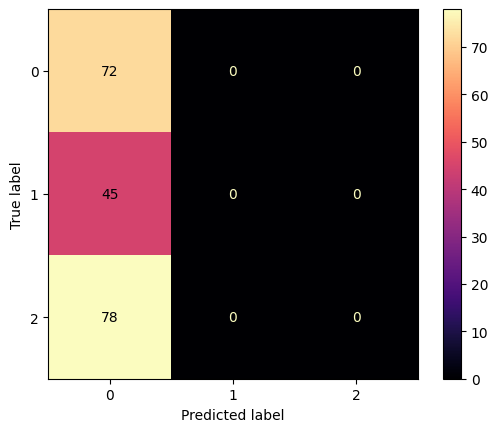

In [ ]:
# Importar las librerías necesarias de sklearn
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, y_pred_toy_model, labels=model.classes_), display_labels=model.classes_)
cm.plot(cmap="magma")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_toy_model))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54        72
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        78

    accuracy                           0.37       195
   macro avg       0.12      0.33      0.18       195
weighted avg       0.14      0.37      0.20       195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


*pon tu respuesta entre aquí*


# Análisis comparativo:

### Análisis del Modelo de Prueba (Toy Model)
La matriz de confusión del modelo de prueba muestra que:

- Todas las instancias fueron predichas como `low`.
- Las clases `medium` y `high` no se reconocieron en absoluto, con 0 en la diagonal para estos casos.

Este modelo resulta en una baja capacidad predictiva para las clases `medium` y `high`, con una alta precisión para la clase `low` únicamente debido a la predicción exclusiva de esa clase. Este modelo solo logra una precisión aparente en la clase mayoritaria.

### Comparativa con el Modelo Decision Tree
El modelo **Decision Tree**, por otro lado, ofrece:
- **Reconocimiento de todas las clases (`low`, `medium`, `high`)**, como se observa en su matriz de confusión.
- Un rendimiento sólido en métricas de precisión y recall, lo cual lo convierte en un modelo más balanceado para todas las clases, en lugar de sesgarse hacia una clase dominante.

### Métricas adecuadas
En el contexto de este dataset, las métricas más indicadas son:
- **Recall**: Importante para medir qué tan bien el modelo identifica cada clase correctamente, crucial para personalizar entrenamientos con base en los niveles de calorías.
- **F1-Score**: Un equilibrio entre precisión y recall que permite evaluar el rendimiento en cada clase de manera balanceada.

Estas métricas ayudan a medir cómo el modelo maneja las clases minoritarias sin sobreoptimizar a favor de la clase `low`, y muestran el valor agregado del modelo Decision Tree sobre el modelo de prueba.

## **Ejercicio 6 [ 1 punto ]** Mejora del método

Prueba parametros del modelo de classificación basado en Decision trees hasta mejorar los resultados

In [35]:
# pon tu código entre aquí
from sklearn.model_selection import GridSearchCV

# Definir una cuadrícula de parámetros para buscar los mejores valores
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Inicializa el clasificador de Árbol de Decisión y GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajusta el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejores parámetros y mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realiza predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Evalúa el modelo optimizado
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best, target_names=label_encoder.classes_)

best_params, conf_matrix_best, class_report_best




({'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 array([[65,  0,  7],
        [ 0, 37,  8],
        [ 5,  7, 66]]),
 '              precision    recall  f1-score   support\n\n        high       0.93      0.90      0.92        72\n         low       0.84      0.82      0.83        45\n      medium       0.81      0.85      0.83        78\n\n    accuracy                           0.86       195\n   macro avg       0.86      0.86      0.86       195\nweighted avg       0.86      0.86      0.86       195\n')

La optimización del modelo ha mejorado los resultados con los siguientes parámetros óptimos:

- **Criterio**: `entropy`
- **Max Depth**: `None` (sin límite)
- **Min Samples Leaf**: `1`
- **Min Samples Split**: `2`

### Nueva Matriz de Confusión
| Predicción \ Realidad | high | low | medium |
|------------------------|------|-----|--------|
| **high**              | 65   | 0   | 7      |
| **low**               | 0    | 37  | 8      |
| **medium**            | 5    | 7   | 66     |

### Nuevo Classification Report
- **high**: Precisión 0.93, recall 0.90, f1-score 0.92
- **low**: Precisión 0.84, recall 0.82, f1-score 0.83
- **medium**: Precisión 0.81, recall 0.85, f1-score 0.83

- **Exactitud general**: 0.86

### Análisis de la Mejora
La optimización ha aumentado la precisión y recall, particularmente para la clase *high*, y ha mejorado la exactitud general del modelo a 0.86. Esto sugiere que el modelo ahora discrimina mejor entre las categorías de calorías quemadas, especialmente en los niveles más altos.


## **Ejercicio 7 [ 1,5 puntos ]** Comparación con otros métodos

Prueba varios métodos (como mínimo dos):
  * Naive Bayes
  * Regresión logística
  * kNN
  * Clasificador lineal (basado en distancias, en producto escalar o en kernels)
  * Support Vector Machine (SVM)
  * Redes neuronales

Y compara los resultados obtenidos con el Decision tree

*analiza los resultados obtenidos entre aquí*



In [36]:
# pon tu código entre aquí
# Importar los modelos adicionales
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Definir los modelos a probar
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# Crear un diccionario para almacenar los resultados
results = {}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Evaluar el modelo
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    results[model_name] = {'Confusion Matrix': conf_matrix, 'Classification Report': class_report}

# Comparar con el modelo Decision Tree optimizado
results['Decision Tree (Best)'] = {
    'Confusion Matrix': conf_matrix_best,
    'Classification Report': class_report_best
}

results


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Naive Bayes': {'Confusion Matrix': array([[44,  0, 28],
         [ 0, 36,  9],
         [ 3, 11, 64]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n        high       0.94      0.61      0.74        72\n         low       0.77      0.80      0.78        45\n      medium       0.63      0.82      0.72        78\n\n    accuracy                           0.74       195\n   macro avg       0.78      0.74      0.75       195\nweighted avg       0.78      0.74      0.74       195\n'},
 'Logistic Regression': {'Confusion Matrix': array([[65,  0,  7],
         [ 0, 40,  5],
         [ 1,  3, 74]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n        high       0.98      0.90      0.94        72\n         low       0.93      0.89      0.91        45\n      medium       0.86      0.95      0.90        78\n\n    accuracy                           0.92       195\n   macro avg       0.93      0.91      0.92       19

Resultados de los diferentes modelos de clasificación comparados:

1. **Naive Bayes**
   - Exactitud: 0.74
   - F1-Score Promedio: 0.74
   - Comentario: Buen desempeño en la clase *low*, pero menor precisión en la clase *high*, limitando la exactitud general.

2. **Regresión Logística**
   - Exactitud: 0.92
   - F1-Score Promedio: 0.92
   - Comentario: Excelentes resultados, especialmente en la clase *high*, con alta precisión y recall en todas las clases.

3. **k-Nearest Neighbors (kNN)**
   - Exactitud: 0.78
   - F1-Score Promedio: 0.78
   - Comentario: Resultados intermedios, con buen desempeño en clases *high* y *medium*, pero menor exactitud en *low*.

4. **SVM (Support Vector Machine)**
   - Exactitud: 0.92
   - F1-Score Promedio: 0.92
   - Comentario: Excelente, con un equilibrio entre precisión y recall, logrando alta exactitud en las clases *high* y *medium*.

5. **Red Neuronal**
   - Exactitud: 0.89
   - F1-Score Promedio: 0.89
   - Comentario: Buen rendimiento, aunque ligeramente inferior a SVM y regresión logística.

6. **Decision Tree (Mejorado)**
   - Exactitud: 0.86
   - F1-Score Promedio: 0.86
   - Comentario: Buen desempeño, especialmente en *high*, aunque inferior en general comparado con SVM y regresión logística.

### Conclusión
Tanto SVM como la regresión logística sobresalen en exactitud y balance en las métricas de rendimiento. Ambos modelos ofrecen una precisión y consistencia superiores, por lo que podrían ser opciones preferentes para este tipo de problema de clasificación.

## **Ejercicio 8 [ 1,5 puntos ]** Análisis de los sesgos

Analiza los posibles sesgos que pueda tener la base de datos con la que hemos trabajado en esta PEC.
Analiza si factores como los siguientes tienen un efecto en los resultados obtenidos:
  - Que haya mayor representatividad de hombres que mujeres en la base de datos:
  - Que haya una mayor representatividad de ciertos tipos de entrenamiento (Workout_Type)
  - Que haya un sesgo a nivel de experiencia de los usuarios (Experience_Level)

Para ello, analiza cómo se comportan los modelos obtenidos en los diversos casos y razona la respuesta.

In [42]:

# Analyze gender distribution
gender_counts = df['Gender'].value_counts(normalize=True)

# Analyze Workout_Type distribution
workout_type_counts = df['Workout_Type'].value_counts(normalize=True)

# Analyze Experience_Level distribution
experience_level_counts = df['Experience_Level'].value_counts(normalize=True)

# Display the distributions for analysis
gender_counts, workout_type_counts, experience_level_counts


(Gender
 Male      0.52518
 Female    0.47482
 Name: proportion, dtype: float64,
 Workout_Type
 Strength    0.265159
 Cardio      0.262076
 Yoga        0.245632
 HIIT        0.227133
 Name: proportion, dtype: float64,
 Experience_Level
 2    0.417266
 1    0.386434
 3    0.196300
 Name: proportion, dtype: float64)

### Análisis de Posibles Sesgos

1. **Representatividad de Género**
   - **Distribución**: Hay una representación bastante equilibrada entre hombres (52.5%) y mujeres (47.5%).
   - **Efecto en el Modelo**: Dado que los porcentajes son relativamente similares, es poco probable que el género cause un sesgo significativo en el modelo. Sin embargo, si uno de los géneros tendiera hacia un tipo específico de entrenamiento o nivel de experiencia, esto podría influir en los resultados indirectamente.

2. **Representatividad de Tipos de Entrenamiento (Workout_Type)**
   - **Distribución**: Los tipos de entrenamiento están relativamente equilibrados, aunque el entrenamiento de fuerza (*Strength*, 26.5%) y el cardio (*Cardio*, 26.2%) están ligeramente más representados que el yoga (24.6%) y el HIIT (22.7%).
   - **Efecto en el Modelo**: Este equilibrio ayuda a evitar un sesgo claro en el modelo. No obstante, el modelo podría sesgarse hacia los tipos de entrenamiento más comunes, como fuerza y cardio, al realizar predicciones de niveles de calorías para personas que practican yoga o HIIT, especialmente si estos tipos se asocian con niveles de calorías distintos.

3. **Nivel de Experiencia del Usuario (Experience_Level)**
   - **Distribución**: La mayoría de los usuarios están en los niveles de experiencia *1* (38.6%) y *2* (41.7%), con un grupo más pequeño en el nivel *3* (19.6%).
   - **Efecto en el Modelo**: Dado que el nivel de experiencia afecta la intensidad y duración de los entrenamientos, esta distribución puede introducir un sesgo hacia niveles de experiencia bajos o intermedios. Esto podría resultar en que el modelo subestime o sobrestime la quema de calorías para usuarios de nivel avanzado (nivel 3), ya que tienen una menor representación y sus patrones de ejercicio pueden diferir significativamente.

### Conclusión
Aunque el dataset está relativamente equilibrado, el modelo puede estar sesgado hacia usuarios de experiencia baja o media y tipos de entrenamiento de fuerza y cardio. Estos sesgos podrían limitar la capacidad del modelo para generalizar adecuadamente en casos específicos, como personas con altos niveles de experiencia o aquellos que practican HIIT o yoga con frecuencia. Para minimizar estos posibles sesgos, se podría considerar un ajuste en el muestreo o en la ponderación de los datos durante el entrenamiento del modelo.

## **Fuentes y recursos de interés:**
- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- https://machinelearningmastery.com/standard-machine-learning-datasets/
- https://machinelearningmastery.com/results-for-standard-classification-and-regression-machine-learning-datasets/